<img src=images/film3.jpg width = "1500" height = "4000">

# Its Movie Time!!

#### _By: Sarah, Brendan and Ben_

- - -

## Project Overview

One of the most important in steps in any movie making is pre-production. These stage includes all the 




- note to group: if there is time midweek we will look into what studios did the best
- note to group: the numbers data is NOT adjusted for inflation 

**ASK JELLY/JULIAN FOR DATA DICTIONARY: HOW DOES THE NUMBERS CALCULATE WORLDWIDE? ALSO, SOME MOVIE STUDIOS ARE NOT LOCATED IN THE US, WHAT DOES DOMESTIC MEAN BY THAT?




In [1]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!ls Data

README 2.md             im.db.zip               tmdb.movies.csv.gz
bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz
im.db                   rt.reviews.tsv.gz


In [3]:
# Reading all the datasets that will be used for the project
tn_df = pd.read_csv('Data/tn.movie_budgets.csv.gz')
tn_df = tn_df.rename(columns = {'title': 'movie'})
database = "Data/im.db"
connection = sql.connect(database)

In [4]:
# connecting sqlite3 cursor
query = ''' SELECT * FROM movie_basics'''
sql_df = pd.read_sql_query(query, connection)
sql_df = sql_df.rename(columns = {'primary_title': 'movie'})

### Data Cleaning And Preparation.

In [5]:
# Starting cleaning the tn_df file by removing all the comma's and $ and make them integers which would be much
# much easier for data manipulation
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
tn_df['production_budget'] = tn_df['production_budget'].str[1:]
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '').astype(np.int64)
tn_df['domestic_gross'] = tn_df['domestic_gross'].str[1:]
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '').astype(np.int64)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str[1:]
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '').astype(np.int64)

In [7]:
# Now we start filtering our data for movies production budget under $5,000.000
prod_budget = tn_df[tn_df.production_budget < 5000000].index
tn_df.drop(prod_budget, inplace = True)
ww_gross = tn_df[tn_df.worldwide_gross < 5000000].index
tn_df.drop(ww_gross, inplace = True)

tn_df.set_index('movie')

#note to group: we will not filter for the production budget, we will look at all movies 
#note to ben: beautiful filtering!!! thank you so much <3 

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747
...,...,...,...,...,...
Rabbit Hole,52,"Dec 17, 2010",5000000,2229058,6205034
Paterson,54,"Dec 28, 2016",5000000,2141423,10727536
The Machinist,57,"Oct 22, 2004",5000000,1082044,8655397


In [8]:
# We will now starting on creating our master dataset by combining both datasets
master_data = tn_df.merge(sql_df, on = 'movie').drop\
(columns = ['original_title', 'start_year', 'id'])

In [9]:
# We will be removing any duplicates from our dataset
master_data = master_data.drop_duplicates(subset  = 'movie').set_index('movie')
master_data.tail(10)

,release_date,production_budget,domestic_gross,worldwide_gross,movie_id,runtime_minutes,genres
movie,,,,,,,
The Belko Experiment,"Mar 17, 2017",5000000,10166820,11792942,tt1082807,89.0,"Horror,Thriller"
The Perfect Match,"Mar 11, 2016",5000000,9669521,10182050,tt3444696,87.0,"Biography,Documentary,Family"
The Forsaken,"Apr 27, 2001",5000000,6755271,6755271,tt5124556,86.0,"Drama,Horror,Thriller"
Fahrenheit 11/9,"Sep 21, 2018",5000000,6352306,6653715,tt8632862,128.0,Documentary
Sea Rex 3D: Journey to a Prehistoric World,"May 28, 2010",5000000,6096582,16515203,tt1529567,41.0,Documentary
Incarnate,"Dec 2, 2016",5000000,4799774,9371036,tt3216348,91.0,"Horror,Thriller"
The Other Side of the Door,"Mar 4, 2016",5000000,3000342,12905107,tt3566920,90.0,Drama
Kill the Messenger,"Oct 10, 2014",5000000,2450846,6656705,tt1216491,112.0,"Biography,Crime,Drama"
Rabbit Hole,"Dec 17, 2010",5000000,2229058,6205034,tt0935075,91.0,Drama


In [10]:
# We will create a new column for movies released month to help with manipulation of our data
master_data['release_month'] = master_data['release_date'].str[:3]



In [11]:
# The next step is to drop all the NaN and get our data ready for analysis
master_data.dropna(inplace = True)

In [12]:
#creating two ROIs columns: worldwide ROI & domestic ROI
master_data['domestic_ROI_perc'] = (master_data['domestic_gross'] - master_data['production_budget']) / master_data['production_budget'] * 100

master_data['worldwide_ROI_perc'] =(master_data['worldwide_gross'] - master_data['production_budget']) / master_data['production_budget'] * 100

In [13]:
master_data.head()

,release_date,production_budget,domestic_gross,worldwide_gross,movie_id,runtime_minutes,genres,release_month,domestic_ROI_perc,worldwide_ROI_perc
movie,,,,,,,,,,
Avatar,"Dec 18, 2009",425000000,760507625,2776345279,tt1775309,93.0,Horror,Dec,78.942971,553.257713
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000,241063875,1045663875,tt1298650,136.0,"Action,Adventure,Fantasy",May,-41.289850,154.667286
Dark Phoenix,"Jun 7, 2019",350000000,42762350,149762350,tt6565702,113.0,"Action,Adventure,Sci-Fi",Jun,-87.782186,-57.210757
Avengers: Age of Ultron,"May 1, 2015",330600000,459005868,1403013963,tt2395427,141.0,"Action,Adventure,Sci-Fi",May,38.840250,324.384139
Avengers: Infinity War,"Apr 27, 2018",300000000,678815482,2048134200,tt4154756,149.0,"Action,Adventure,Sci-Fi",Apr,126.271827,582.711400


Text(0.5, 0, 'Month of Release')

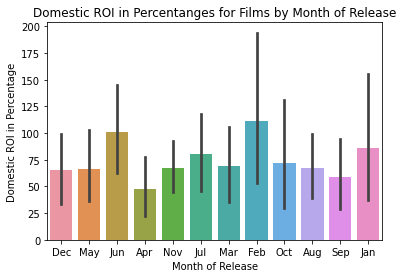

In [14]:
#graph 1: relationship between domestic ROI and release month 
fig, ax = plt.subplots()


#setting x and y variables 
y1 = master_data['domestic_ROI_perc']
x1 = master_data['release_month']


#graphing variables
ax = sns.barplot(x=x1, y=y1, data=master_data)


#setting lables and titles
ax.set_title("Domestic ROI in Percentanges for Films by Month of Release")
ax.set_ylabel("Domestic ROI in Percentage")
ax.set_xlabel("Month of Release")

#I am pretty sure (according to documentation) that the lines are confidence intervals --> we can use any statistical function


#we can also use median as the estimator by doing this:
#from numpy import median
#y = master_data['domestic_ROI_perc']
#x = master_data['release_month']

#ax = sns.barplot(x=x, y=y, data=master_data, estimator=median).set(title="Domestic ROI in Percentanges for Films by Month of Release")

#ax.set_xlabel("Month of Release")
#ax.set_ylabel("Domestic ROI in Percentages")

In [15]:
#DRAFT OF GRAPH 1

#going to start making graphs showing the relationsships between ROI and release month 

#graph 1: release month & domestic roi
#y = master_data['domestic_ROI_perc']
#x = master_data['release_month']

#fig, ax = plt.subplots()
#ax.bar(x,y)

#quesstionss to investigate: how to make a graph to see negativee values, is doing ROI in percent better or should i do plain numbers 
#possible explanations: from the wiki for the oscars; the oscars are usually held in mid to late february or march --> oscars happen and there is a boost in ticket sales or rental/streaming purchaes
#maybe a lot of new releasess come out in jnaury in time for the osccars and other film awards

Text(0.5, 0, 'Month of Release')

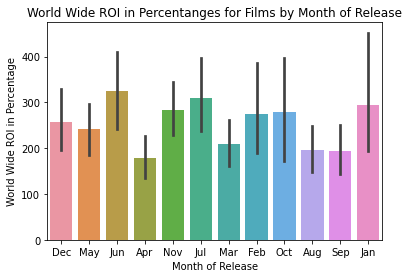

In [16]:
#graph 2: world wide roi and release month
fig, ax = plt.subplots()

#setting x and y variables
y2= master_data['worldwide_ROI_perc']
x2 = master_data['release_month']

#graphing
ax= sns.barplot(x=x2, y=y2, data=master_data)

#setting labels and titles
ax.set_title("World Wide ROI in Percentanges for Films by Month of Release")
ax.set_ylabel("World Wide ROI in Percentage")
ax.set_xlabel("Month of Release")








#NOTE: WORLD WIDE ROI INCLUDES DOMESTIC ROI







In [17]:
#DRAFT: graph 2: release month & worldwide_ROI
#y= master_data['worldwide_ROI_perc']
#x = master_data['release_month']

#fig, ax = plt.subplots()
#ax.bar(x,y)

#intial insights: similar pattern as domestic, esp with that feburary thing --> much greater increase for january (could be holiday season, people want or need something to do bc most things are closed and also awards season )

In [18]:
relation_df = master_data['runtime_minutes'].to_frame().join(master_data['worldwide_ROI_perc'])
relation_df.head()

,runtime_minutes,worldwide_ROI_perc
movie,,
Avatar,93.0,553.257713
Pirates of the Caribbean: On Stranger Tides,136.0,154.667286
Dark Phoenix,113.0,-57.210757
Avengers: Age of Ultron,141.0,324.384139
Avengers: Infinity War,149.0,582.711400


Text(0.5, 0, 'runtime_minutes')

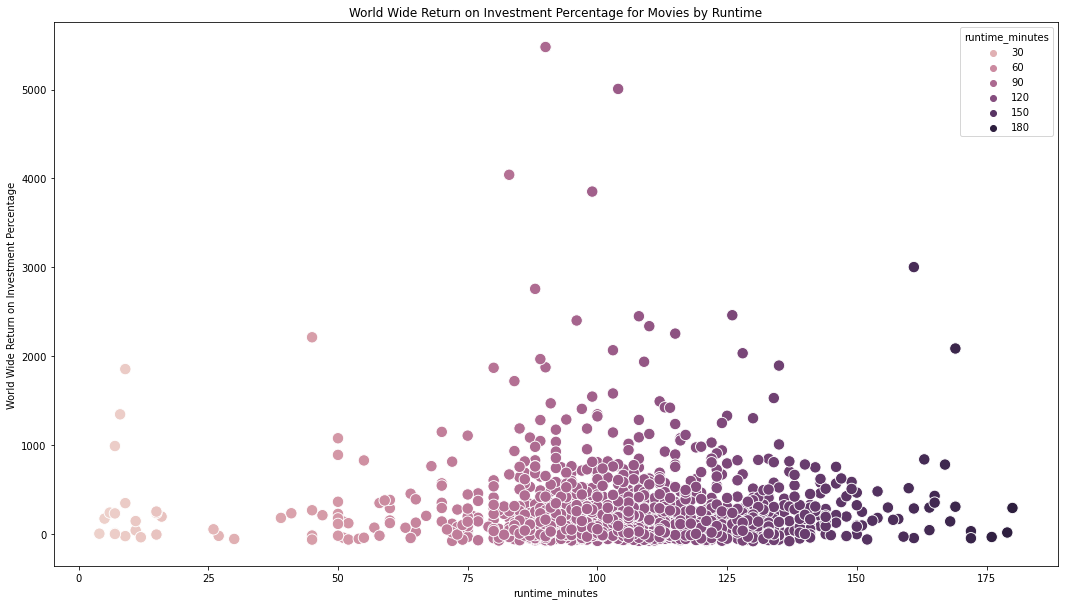

In [27]:
fig, ax = plt.subplots(figsize = (18, 10))

#setting x and y variables
x_df= relation_df['runtime_minutes']
y_df = relation_df['worldwide_ROI_perc']

#graphing
ax= sns.scatterplot(x = x_df, y = y_df, data = relation_df, hue = 'runtime_minutes', s = 130)

#setting labels and titles
ax.set_title("World Wide Return on Investment Percentage for Movies by Runtime")
ax.set_ylabel("World Wide Return on Investment Percentage")
ax.set_xlabel("runtime_minutes")

In [20]:
relation_df_2 = master_data['runtime_minutes'].to_frame().join(master_data['domestic_ROI_perc'])

In [21]:
relation_df_2.head()

,runtime_minutes,domestic_ROI_perc
movie,,
Avatar,93.0,78.942971
Pirates of the Caribbean: On Stranger Tides,136.0,-41.289850
Dark Phoenix,113.0,-87.782186
Avengers: Age of Ultron,141.0,38.840250
Avengers: Infinity War,149.0,126.271827
